In [46]:
import pandas as pd
import sqlite3

In [47]:
sql_conn = sqlite3.connect('../data/checking-logs.sqlite')

In [48]:
query = """
    SELECT timestamp
    FROM checker
    WHERE uid LIKE 'user_%'
"""
df_commits = pd.io.sql.read_sql(query, sql_conn, parse_dates=['timestamp'])
df_commits['date'] = df_commits.timestamp.dt.date
df_commits['hour'] = df_commits.timestamp.dt.hour
df_commits['dayofweeks'] = df_commits.timestamp.dt.dayofweek
df_commits.drop(['timestamp'], axis=1, inplace=True)
df_commits.head()

,date,hour,dayofweeks
0,2020-04-17,5,4
1,2020-04-17,5,4
2,2020-04-17,5,4
3,2020-04-17,5,4
4,2020-04-17,5,4


In [49]:
df_commits['day'] = df_commits.dayofweeks.agg(lambda x: 'weekend' if x > 4 else 'working_day')
df_commits

,date,hour,dayofweeks,day
0,2020-04-17,5,4,working_day
1,2020-04-17,5,4,working_day
2,2020-04-17,5,4,working_day
3,2020-04-17,5,4,working_day
4,2020-04-17,5,4,working_day
...,...,...,...,...
3202,2020-05-21,20,3,working_day
3203,2020-05-21,20,3,working_day
3204,2020-05-21,20,3,working_day
3205,2020-05-21,20,3,working_day


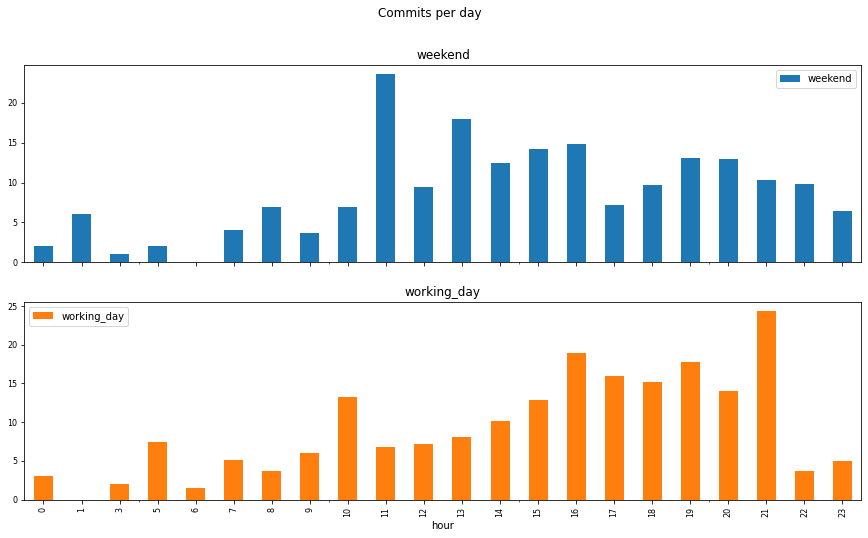

In [50]:
df_weeks = df_commits.groupby(['day', 'date', 'hour']).count().groupby(['day', 'hour']).mean().reset_index()
df_weeks = pd.pivot(df_weeks, values='dayofweeks', index='hour', columns='day')
df_weeks.plot(kind='bar', subplots=True, fontsize=8, figsize=(15,8), title='Commits per day');

## Is the dynamic different on working days and weekends?
Answer: Yes, it's. Dynamic is different.
## The number of commits is the largest during working days
Answer: 21
## The number of commits is the largest during weekend
Answer: 11


In [51]:
sql_conn.close()